# Import Library

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Exploring Anime

In [4]:
anime_df = pd.read_csv('../dataset/anime.csv')
print(f'Total anime: {len(anime_df)}')

Total anime: 27970


In [5]:
anime_df.sample(1)

,id,title,title_english,type,source,episodes,status,airing,rating,score,rank,synopsis,season,year,start,ending,studios,genres
1959,2140,Aniyome,NaN,OVA,Visual novel,2,Finished Airing,False,Rx - Hentai,6.34,28072,"All his life, Takashi has been compared to his...",NaN,2004,2004-10-08,2004-10-08,Y.O.U.C,Hentai


In [6]:
anime_df.isnull().sum()

id                   0
title                0
title_english    16023
type                 0
source               0
episodes             0
status               0
airing               0
rating               0
score                0
rank                 0
synopsis          4971
season           21933
year                 0
start              887
ending             887
studios          11506
genres            5766
dtype: int64

In [9]:
genres_df = pd.read_csv('../dataset/genre_time_series.csv')
genres_df.head(5)

,year,Action,Adventure,Avant Garde,Award Winning,Boys Love,Comedy,Drama,Ecchi,Erotica,...,Gourmet,Hentai,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense
0,0,116,121,2,0,4,132,80,8,4,...,3,0,3,15,43,49,17,15,20,6
1,1917,0,0,0,0,0,12,4,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1918,0,0,0,0,0,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1924,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1925,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [10]:
genres_df = genres_df.drop(genres_df.index[0])
genres_df.head(5)

,year,Action,Adventure,Avant Garde,Award Winning,Boys Love,Comedy,Drama,Ecchi,Erotica,...,Gourmet,Hentai,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense
1,1917,0,0,0,0,0,12,4,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1918,0,0,0,0,0,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1924,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1925,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
5,1926,0,2,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [12]:
genres_list = list(genres_df.columns)[1:]
genres_list

['Action',
 'Adventure',
 'Avant Garde',
 'Award Winning',
 'Boys Love',
 'Comedy',
 'Drama',
 'Ecchi',
 'Erotica',
 'Fantasy',
 'Girls Love',
 'Gourmet',
 'Hentai',
 'Horror',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Slice of Life',
 'Sports',
 'Supernatural',
 'Suspense']

In [35]:
earliest = genres_df.iloc[0]['year']
newest = genres_df.iloc[-1]['year']
earliest, newest

(np.int64(1917), np.int64(2026))

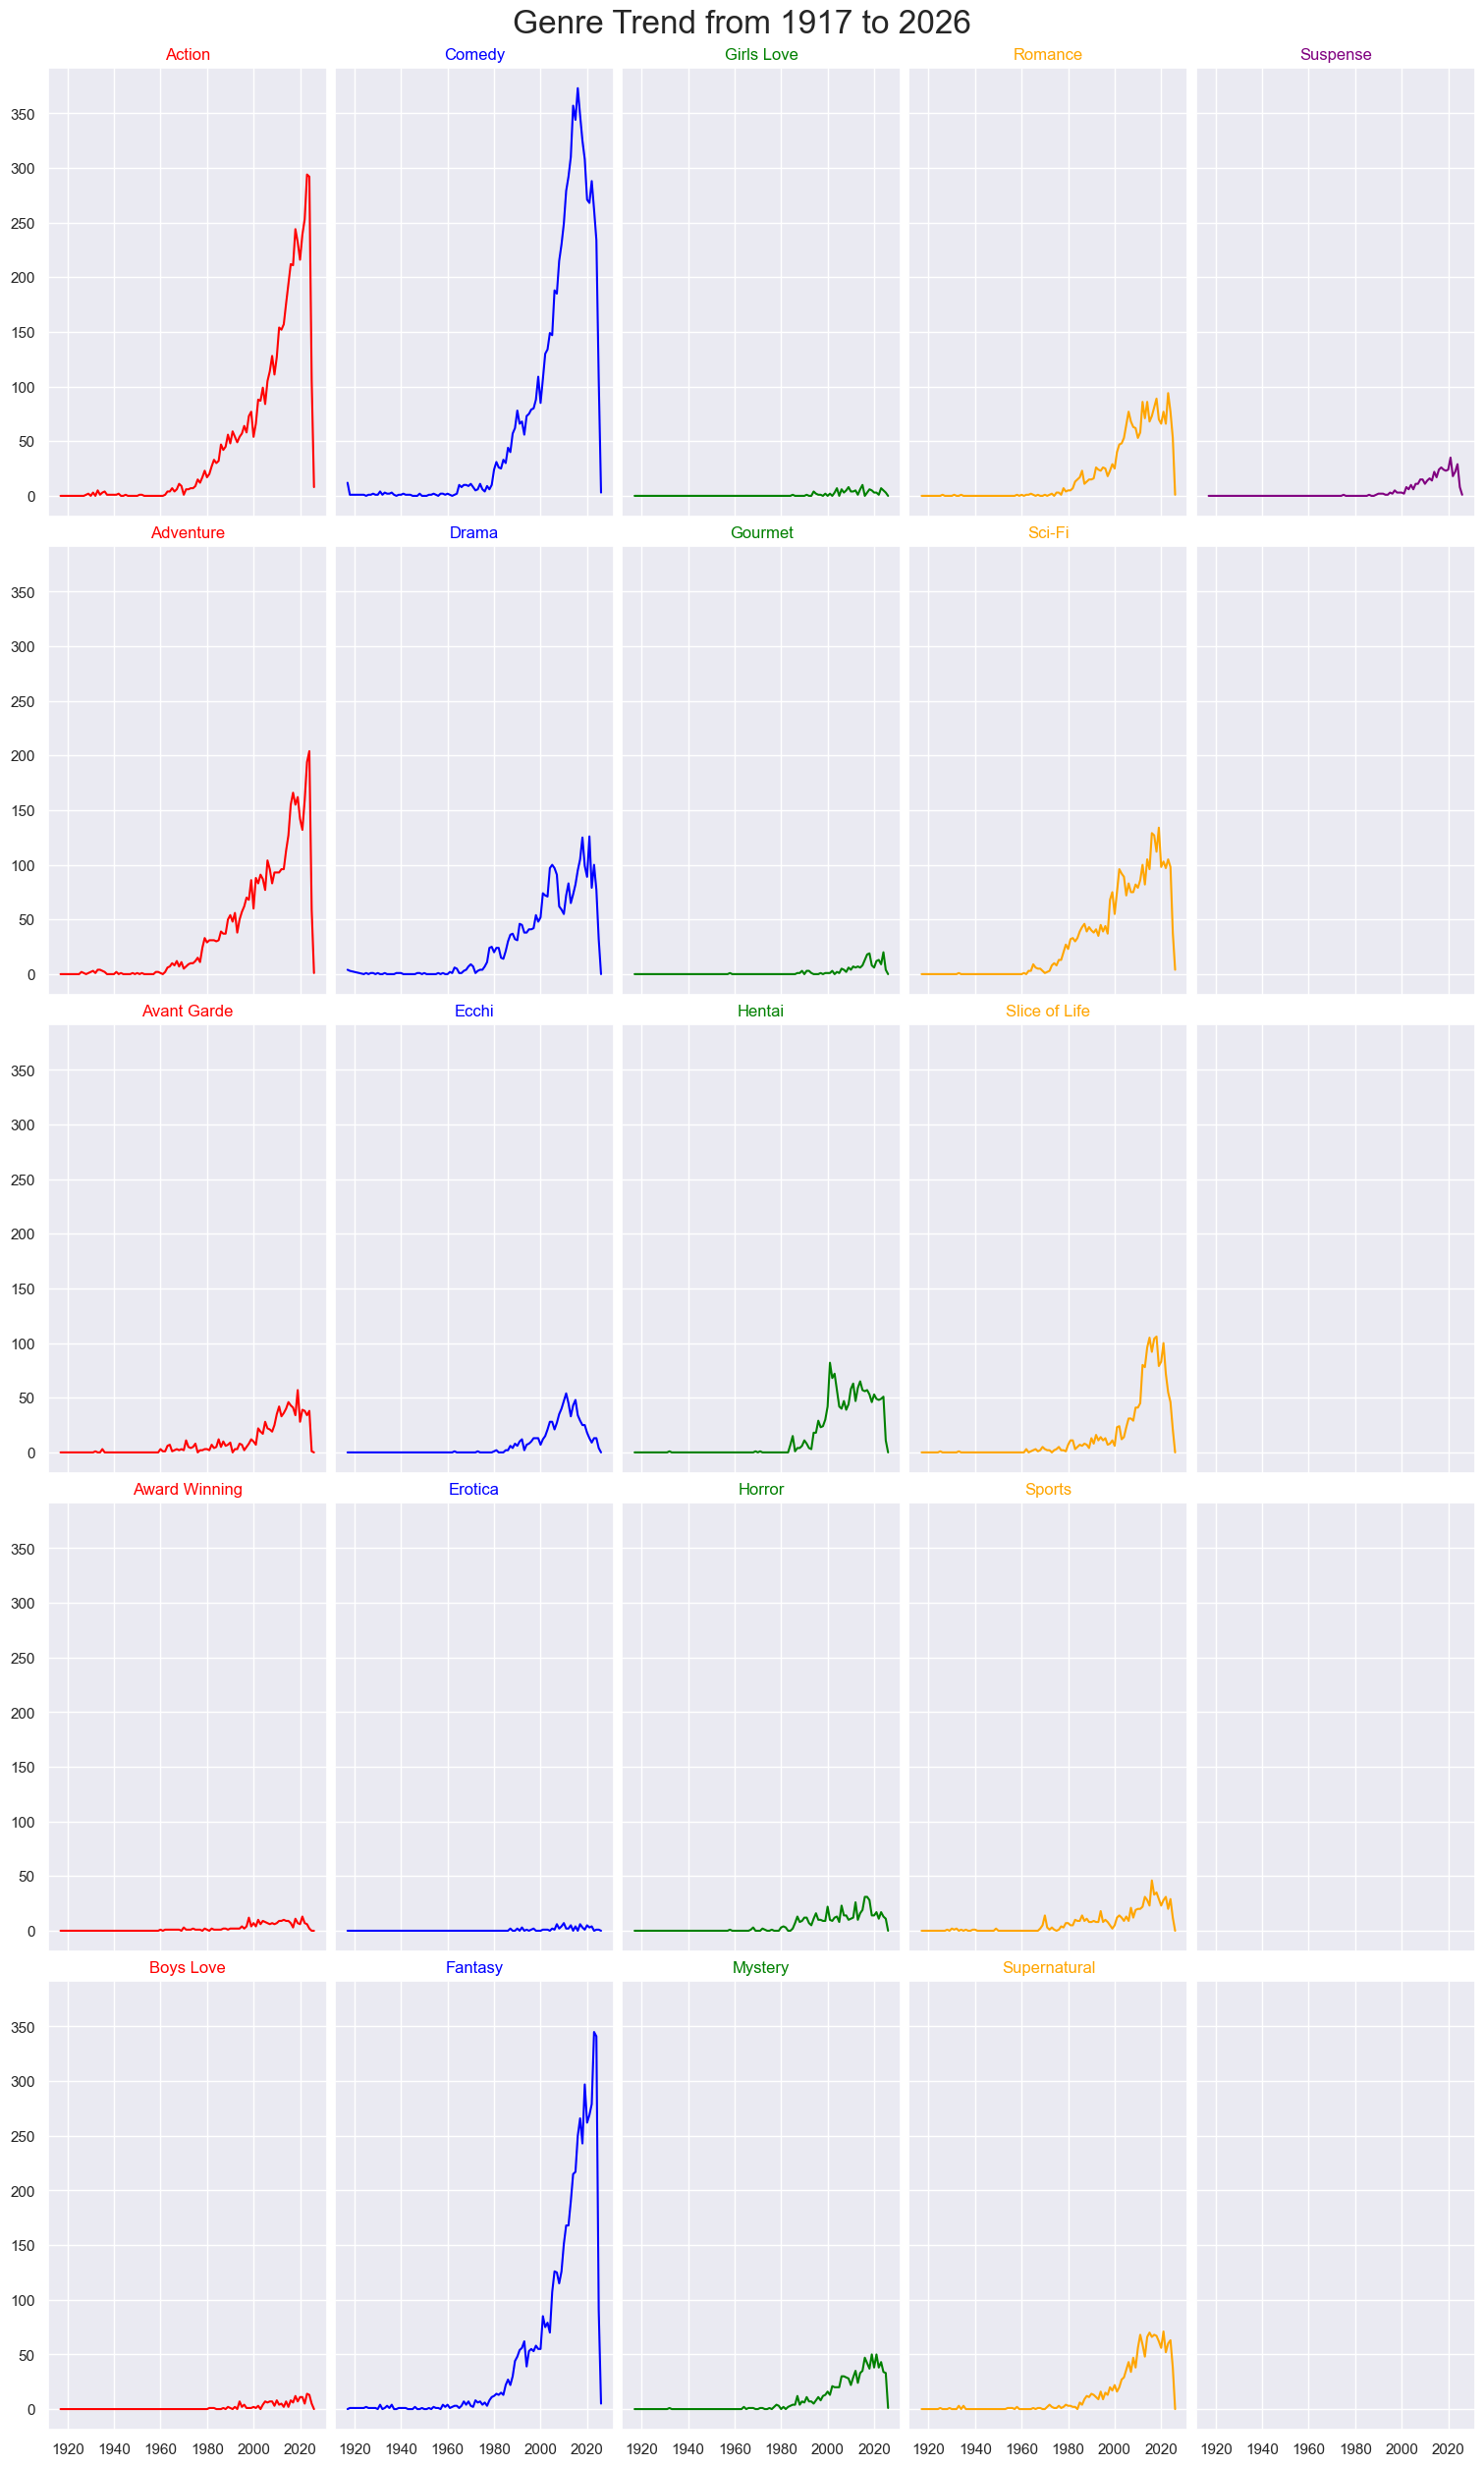

In [53]:
sns.set_theme()
colors = ['red', 'blue', 'green', 'orange', 'purple']

fig, axs = plt.subplots(5, 5, figsize=(15, 25), sharey=True, sharex=True, constrained_layout=True)
fig.suptitle(f'Genre Trend from {earliest} to {newest}', fontsize=24)

x_index = 0
y_index = 0

for genre in genres_list:
    axs[x_index, y_index].plot('year', genre, data=genres_df, color=colors[y_index])
    axs[x_index, y_index].set_title(f'{genre}', color=colors[y_index])
    if x_index == 4:
        x_index -= 5
        y_index += 1
    x_index += 1    

plt.show()